In [286]:
import pandas as pd
from datetime import datetime
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [95]:
def getDFfromFile():
    df = pd.read_csv('household_power_consumption.txt', sep = ';', header=1)
    df.columns = ['date', 'time', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2','sub_metering_3']
    df = df[df.global_active_power != '?']
    df = df[df.voltage != '?']
    df = df[df.global_intensity != '?']
    df = df[df.sub_metering_1 != '?']
    df = df[df.sub_metering_2 != '?']
    df["global_active_power"] = df["global_active_power"].apply(pd.to_numeric)
    df["voltage"] = df["voltage"].apply(pd.to_numeric)
    df[["global_intensity"]] = df[["global_intensity"]].apply(pd.to_numeric)
    df["sub_metering_1"] = df["sub_metering_1"].apply(pd.to_numeric)
    df["sub_metering_2"] = df["sub_metering_2"].apply(pd.to_numeric)
    df.date = pd.to_datetime(df.date + '/' + df.time,format = '%d/%m/%Y/%H:%M:%S')
    del df['time']
    df = df.rename(columns={'date': 'dateTime'}) 
    return df

In [96]:
df = getDFfromFile()

In [97]:
def printDF(df):
    return df

In [98]:
printDF(df)

,dateTime,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
1,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
3,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
4,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
...,...,...,...,...,...,...,...,...
2075253,2010-11-26 20:58:00,0.946,0,240.43,4.0,0.0,0.0,0.0
2075254,2010-11-26 20:59:00,0.944,0,240.00,4.0,0.0,0.0,0.0
2075255,2010-11-26 21:00:00,0.938,0,239.82,3.8,0.0,0.0,0.0
2075256,2010-11-26 21:01:00,0.934,0,239.70,3.8,0.0,0.0,0.0


In [228]:
def getGAPMore(df,kvt):
    df = df[df.global_active_power > float(kvt)]
    return df

In [229]:
%%timeit  
getGAPMore(df,5)

6.31 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [231]:
def getVoltageMore(df,v):
    df = df[df.voltage > float(v)]
    return df

In [232]:
%%timeit 
getVoltageMore(df,235)

137 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [233]:
def getIntensity(df,min,max):
    df = df[df.global_intensity >= float(min)]
    df = df[df.global_intensity <= float(max)]
    df = df[df.sub_metering_2 > df.sub_metering_3]
    return df

In [234]:
%%timeit
getIntensity(df,19,20)

10.2 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [236]:
random_df = df.sample(500000)

In [237]:
def getRandom(df):
    mean1 = df.sub_metering_1.mean()
    mean2 = df.sub_metering_2.mean()
    mean3 = df.sub_metering_3.mean()
    return (mean1,mean2,mean3)

In [239]:
%%timeit
result = getRandom(random_df)
# print(result)

1.75 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [240]:
def fifth(df):
    df = df[df.dateTime.dt.hour >= 18]
    df = df[(df.sub_metering_1 + df.sub_metering_2 + df.sub_metering_3)/3 >= 6]
    df = df[(df.sub_metering_2 > df.sub_metering_1) & (df.sub_metering_2 > df.sub_metering_3)]
    df1 = df[:int(len(df.index)/2)+1]
    df2 = df[int(len(df.index)/2)+1:]
    df1 = df.iloc[::3, :]
    df2 = df.iloc[::4, :]
    df3= pd.concat([df1,df2])
    return df3

In [241]:
%%timeit
fifth(df)

234 ms ± 4.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [244]:
%%time
array = df.values

Wall time: 7.5 s


In [246]:
print(array)

[[Timestamp('2006-12-16 17:25:00') 5.36 '0.436' ... 0.0 1.0 16.0]
 [Timestamp('2006-12-16 17:26:00') 5.374 '0.498' ... 0.0 2.0 17.0]
 [Timestamp('2006-12-16 17:27:00') 5.388 '0.502' ... 0.0 1.0 17.0]
 ...
 [Timestamp('2010-11-26 21:00:00') 0.938 0.0 ... 0.0 0.0 0.0]
 [Timestamp('2010-11-26 21:01:00') 0.934 0.0 ... 0.0 0.0 0.0]
 [Timestamp('2010-11-26 21:02:00') 0.932 0.0 ... 0.0 0.0 0.0]]


In [249]:
def getGAPMoreNum(array,kvt):
    result = array[array[:,1] >= float(kvt)]
    return result

In [251]:
%%timeit
getGAPMoreNum(array,5)

49.1 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [256]:
def getVoltageMoreNum(num,v):
    result = np.where(array[:,3] >= float(v))
    result = array[result]
    return result

In [257]:
%%timeit
getVoltageMoreNum(num,235)

370 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [258]:
def getIntensityNum(array,minInt,maxInt):
    result = array[(array[:,4] >= float(minInt)) & (array[:,4] <= float(maxInt)) & (array[:,6] >= array[:,7])]
    return result

In [259]:
%%timeit
getIntensityNum(array,19,20)

113 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [262]:
array_random = np.random.permutation(array)[:500000]

In [263]:
def getRandomNum(array):
    mean1 = array[:,5].mean()
    mean2 = array[:,6].mean()
    mean3 = array[:,7].mean()
    return (mean1,mean2,mean3)

In [264]:
%%timeit
getRandomNum(array_random)

101 ms ± 875 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [269]:
print(array[:,0])

[Timestamp('2006-12-16 17:25:00') Timestamp('2006-12-16 17:26:00')
 Timestamp('2006-12-16 17:27:00') ... Timestamp('2010-11-26 21:00:00')
 Timestamp('2010-11-26 21:01:00') Timestamp('2010-11-26 21:02:00')]


In [276]:
def fifthNum(array):
    result = array[(str(array[:,0]).split(' ')[1].split(':')[0] >='18') & ((array[:,5]+array[:,6]+array[:,7])/3 > 6) & (array[:,6] > array[:,7])]
    result1 = result[:int(array.shape[0]/2)+1:3]
    result2 = result[int(array.shape[0]/2)+1::4]
    return result1,result2

In [277]:
%%timeit
fifthNum(array)

331 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [224]:
def smth(df):
    
    return df

In [225]:
smth(df)

,dateTime,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
1,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
3,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
4,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
...,...,...,...,...,...,...,...,...
2075253,2010-11-26 20:58:00,0.946,0,240.43,4.0,0.0,0.0,0.0
2075254,2010-11-26 20:59:00,0.944,0,240.00,4.0,0.0,0.0,0.0
2075255,2010-11-26 21:00:00,0.938,0,239.82,3.8,0.0,0.0,0.0
2075256,2010-11-26 21:01:00,0.934,0,239.70,3.8,0.0,0.0,0.0


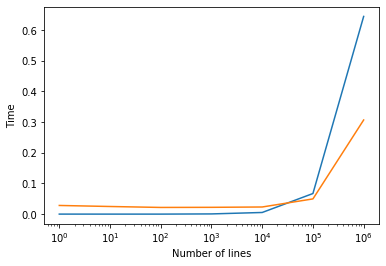

In [309]:
x = []
y1 = []
y2 = []
for i in range(7):
    i = 10**(i)
    x.append(i)
    y1.append(timeit.timeit('getIntensityNum(array[:i],10,20)',globals = globals(),number = 10))
    y2.append(timeit.timeit('getIntensity(df[:i],10,20)',globals = globals(),number = 10))
fig,ax=plt.subplots()
plt.plot(x,y1)
plt.plot(x,y2)
ax.set_xscale('log')
plt.ylabel('Time')
plt.xlabel('Number of lines')
plt.show()